مینا ایلخانی ۶۱۰۳۹۸۱۹۱

In [1]:
import pandas as pd
df = pd.read_csv("transfusion.data")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [2]:
df.rename(columns={'whether he/she donated blood in March 2007': 'donated'}, inplace=True)
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   donated                748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


/home/minil/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


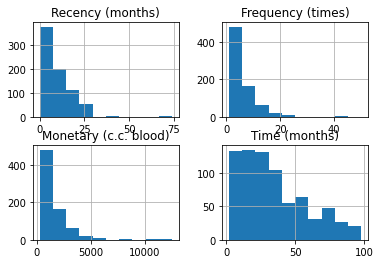

In [4]:
ax = df[df.columns[:-1]].hist()

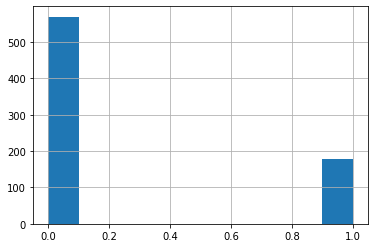

In [5]:
ax = df[df.columns[-1]].hist()

In [6]:
import matplotlib.pyplot as plt

colors=['cyan' if d==0 else 'magenta' for d in df['donated']]
# Recency (months)	Frequency (times)	Monetary (c.c. blood)	Time (months)	donated
def scatter_plot(numOfFeatures):
    ax = []
    fig, ((ax)) = plt.subplots(nrows=numOfFeatures, ncols=numOfFeatures, figsize=(15, 10))
    for n in range(numOfFeatures):
        for m in range(numOfFeatures):
            ax[n][m].scatter(df[df.columns[m]], df[df.columns[n]], s=20, facecolors='none', edgecolors=colors)
            if n == numOfFeatures -1 :
                ax[n][m].set_xlabel(df.columns[m])
            if m == 0:
                ax[n][m].set_ylabel(df.columns[n])

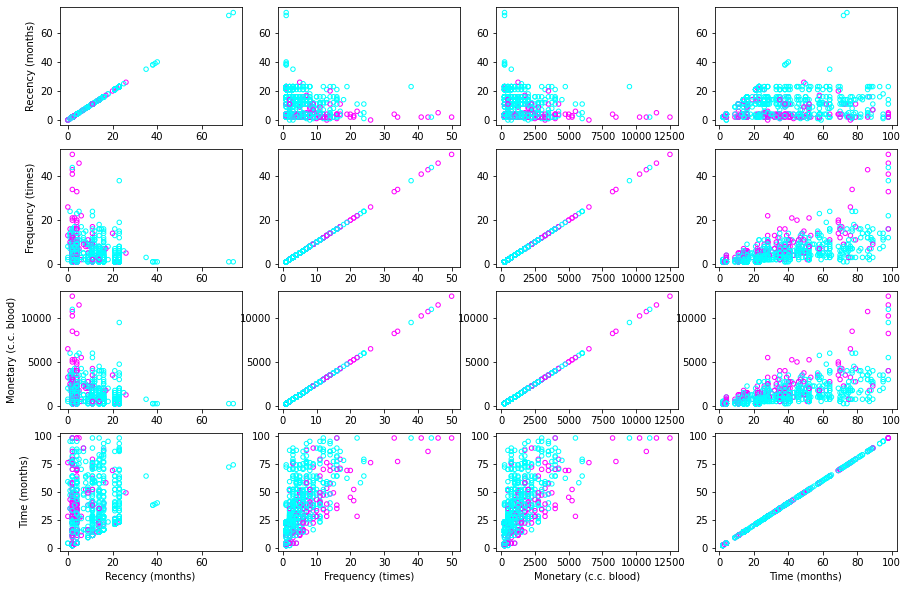

In [7]:
scatter_plot(4)

 نمودار 

Frequency و	Monetary

کاملا خطی اند. یعنی وابستگی دارند. استفاده ی همزمان از هر دو دقت مدل را افزایش نمیدهد و فقط پیچیدگی و زمان زیاد میشود. پس یکی را حدف میکنیم. اگر آنی را حذف کنیم که بازه ی مقادیرش به بازه ی مقادیر سایر فیچر ها نزدیک تر باشد، نمودار جعبه ای بهتری خواهیم داشت

In [8]:
df.drop('Monetary (c.c. blood)', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Recency (months)   748 non-null    int64
 1   Frequency (times)  748 non-null    int64
 2   Time (months)      748 non-null    int64
 3   donated            748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


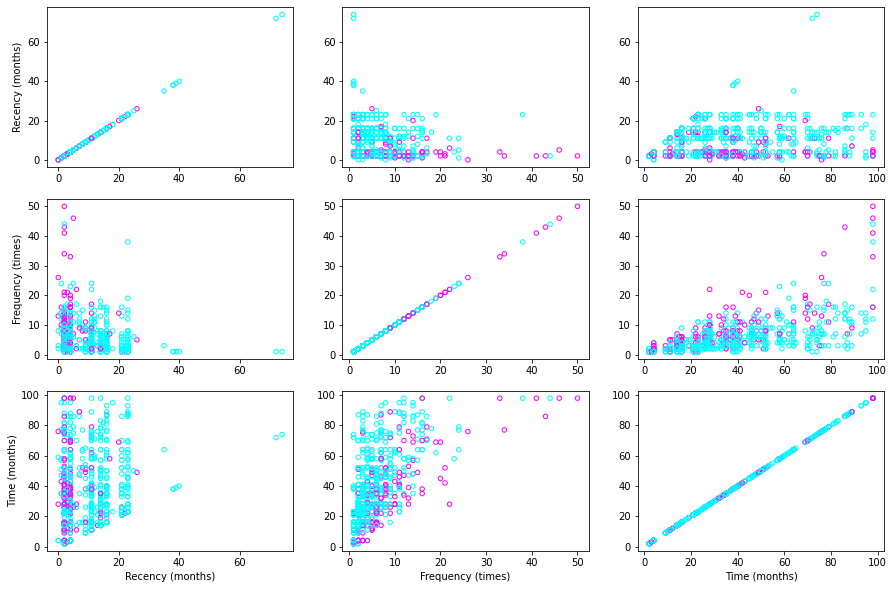

In [9]:
scatter_plot(3)

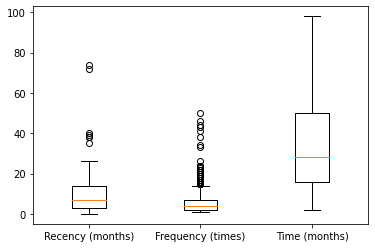

In [10]:
plt.boxplot(df[df.columns[:-1]])
plt.xticks([1, 2, 3],df.columns[:-1] )
plt.show()

In [11]:
from sklearn import tree
from sklearn.model_selection import ShuffleSplit, cross_val_score        # 10fold cross validation
clf = tree.DecisionTreeClassifier()
cv = ShuffleSplit()
Y = df[df.columns[-1]]
def predict(X):
    return cross_val_score(clf, X, Y, cv=cv ).mean()*100

In [12]:
print(predict(df[['Recency (months)']]))
print(predict(df[['Frequency (times)']]))
print(predict(df[['Time (months)']]))
print()
print(predict(df[['Recency (months)', 'Frequency (times)']]))
print(predict(df[['Recency (months)', 'Time (months)']]))
print(predict(df[['Frequency (times)', 'Time (months)']]))
print()
print(predict(df[['Recency (months)', 'Frequency (times)', 'Time (months)']]))

76.0
76.66666666666667
75.6

76.93333333333334
74.13333333333333
71.46666666666668

72.53333333333333
